<a href="https://colab.research.google.com/github/Computer-CGuy/LineFollowerRobot/blob/master/Aeross_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install proj-bin libproj-dev libgeos-dev
!git clone https://github.com/matplotlib/basemap.git
!cd basemap
!pip install ./basemap

## Template

In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

Geostationary, Orthographic or Azimuthal equidistant basemap

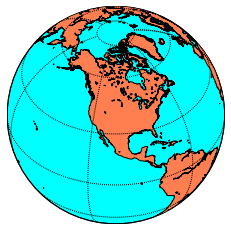

In [3]:
m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
_ = m.drawcoastlines()
_ = m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
_ = m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
_ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #

## Factors

### InterRidge Vents 

In [18]:
!wget http://hs.pangaea.de/Maps/Vents/InterRidge_Beaulieu_2020/vent_fields_all_20200325cleansorted.csv

--2020-07-06 10:29:24--  http://hs.pangaea.de/Maps/Vents/InterRidge_Beaulieu_2020/vent_fields_all_20200325cleansorted.csv
Resolving hs.pangaea.de (hs.pangaea.de)... 134.1.2.173
Connecting to hs.pangaea.de (hs.pangaea.de)|134.1.2.173|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872450 (852K) [application/octet-stream]
Saving to: ‘vent_fields_all_20200325cleansorted.csv’

vent_fields_all_202 100%[===================>] 852.00K  1.18MB/s    in 0.7s    

2020-07-06 10:29:25 (1.18 MB/s) - ‘vent_fields_all_20200325cleansorted.csv’ saved [872450/872450]



In [19]:
!mv vent_fields_all_20200325cleansorted.csv vent_fields.csv

In [83]:
import pandas as pd



In [ ]:
dataset.head()

In [98]:
dataset = pd.read_csv('vent_fields.csv')
dataset = dataset.loc[:,['Latitude','Longitude']]
lat = dataset.loc[:,['Latitude']].values
lon = dataset.loc[:,['Longitude']].values

In [97]:
def getVentCost(la,lo):
    cost = 0
    count = 0
    for t in range(len(lat)):
        # print(lat[t])
        d=(distance(lat[t],la,lon[t],lo))
        if(d>836.9544208060222):
            continue
        cost-=d
        count+=1
        # print(d)
    if(int(cost)==0):
        cost = 1536.9544208060222
        count=0
    cost/=(count+1)
    # cost = sqrt(cost)
    return cost

In [67]:
# getVentCost(lat[0]+0,lon[0])

0.0

In [99]:
n = 0
z = np.zeros((361,181),dtype=np.float128)
for x,i in enumerate(np.linspace(-180.0,180.0,361)): #Lon
    for y,j in enumerate(np.linspace(-90,90,181)): #Lat
        z[x,y] = getVentCost(j,i)
    if(x%100==0):
        print(x)
    if(x%300==0):
        np.save('./drive/My Drive/Aeross Round 2/Ideation/Vents.pkl', z) 

0
100
200
300


In [70]:
np.save('./drive/My Drive/Aeross Round 2/Ideation/Backup/VentsFinal2.pkl', z) 

In [100]:
z = np.transpose(z,(1,0))

In [90]:
z = z.max()-z

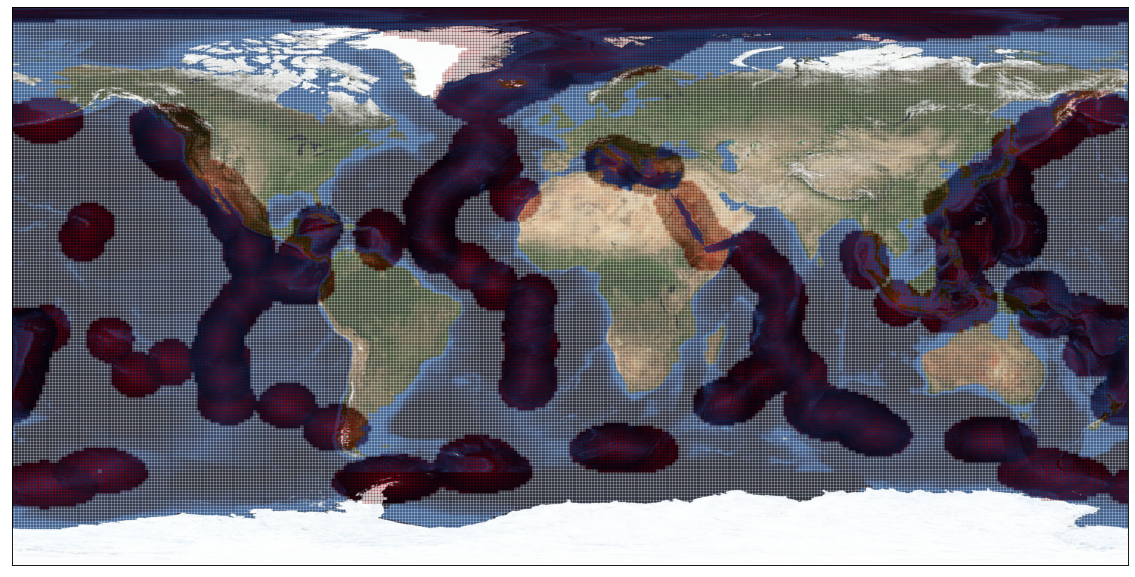

In [101]:
lons = np.arange(-180,181)
lats = np.arange(-90,91)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='i')
# m= Basemap(projection='ortho',lon_0=77,lat_0=28)
# _ = m.drawcoastlines()
_ = m.bluemarble()
# _ = m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
# _ = m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
# _ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
cs = m.pcolor(xi,yi,z,latlon=True,alpha=0.2,cmap='hot')

Geostationary, Orthographic or Azimuthal equidistant basemap

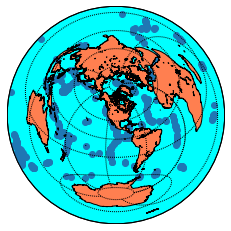

In [40]:
m = Basemap(projection='aeqd',lon_0=-105,lat_0=40,resolution='l')
_ = m.drawcoastlines()
_ = m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
_ = m.drawparallels(np.arange(- 90.,120.,30.),labels=[1,0,0,0]) # draw parallels
_ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
m.scatter(y=lat,x=lon,latlon=True)

In [52]:
lat.shape

(721, 1)

In [54]:
for x in range

In [93]:
z = np.random.rand(lat.shape[0],lat.shape[0])

In [89]:
z*=255

In [95]:
x =  np.array([1,2,3])
y =  np.array([1,2,3])
np.meshgrid(x, y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

Geostationary, Orthographic or Azimuthal equidistant basemap

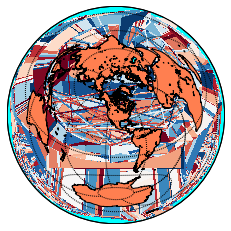

In [94]:
m = Basemap(projection='aeqd',lon_0=-105,lat_0=40,resolution='l')
_ = m.drawcoastlines()
_ = m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
_ = m.drawparallels(np.arange(- 90.,120.,30.),labels=[1,0,0,0]) # draw parallels
_ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
# m.scatter(y=lat,x=lon,latlon=True)
# ellipse = lon * 2 + 4 * lat**2
# x,y = m(*np.meshgrid(lon,lat))
# m.contourf(lon,lat,z,30,cmap=plt.cm.jet,latlon=True)
x,y = np.meshgrid(lon, lat)
m.pcolormesh(x, y, z,
             latlon=True, cmap='RdBu_r')

### Ports

In [102]:
!wget wget --header="Host: geonode.wfp.org" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://geonode.wfp.org/layers/geonode%3Awld_trs_ports_wfp" --header="Cookie: csrftoken=CGov7ICKuNjcc3OdMGXAjsosuAnk1e3l; _ga=GA1.2.1919636593.1594029478; _gid=GA1.2.1801590015.1594029478; time_cookie=ok; _gat=1" --header="Connection: keep-alive" "https://geonode.wfp.org/geoserver/wfs?typename=geonode%3Awld_trs_ports_wfp&outputFormat=csv&version=1.0.0&request=GetFeature&service=WFS" -c -O 'wld_trs_ports_wfp.csv'

--2020-07-06 20:08:30--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-07-06 20:08:30--  https://geonode.wfp.org/geoserver/wfs?typename=geonode%3Awld_trs_ports_wfp&outputFormat=csv&version=1.0.0&request=GetFeature&service=WFS
Resolving geonode.wfp.org (geonode.wfp.org)... 217.118.241.166
Connecting to geonode.wfp.org (geonode.wfp.org)|217.118.241.166|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/csv]
Saving to: ‘wld_trs_ports_wfp.csv’

wld_trs_ports_wfp.c     [       <=>          ] 750.45K   500KB/s    in 1.5s    

2020-07-06 20:08:33 (500 KB/s) - ‘wld_trs_ports_wfp.csv’ saved [768459]

FINISHED --2020-07-06 20:08:33--
Total wall clock time: 2.8s
Downloaded: 1 files, 750K in 1.5s (500 KB/s)


In [143]:
import pandas as pd
dataset = pd.read_csv('wld_trs_ports_wfp.csv')
dataset = dataset.loc[:,['latitude','longitude']]
dataset = dataset.dropna()
lat = dataset.loc[:,['latitude']].values
lon = dataset.loc[:,['longitude']].values

In [128]:
len(lat)

3575

470.0596630691027

In [141]:
def getPortCost(la,lo):
    cost = 0
    count = 0
    e =2.718281
    for t in range(len(lat)):
        # print(lat[t])
        d=(distance(lat[t],la,lon[t],lo))
        if(d>1600.9544208060222):
            continue
        cost+=(e**((d/836.9544208060222)/5))
        # print(d,(e**((d/836.9544208060222)/5)))
        count+=1
        # print(d)
    if(int(cost)==0):
        # cost = 836.9544208060222
        cost=(e**((1)/5))
        count=0
    cost/=(count+1)
    # cost = sqrt(cost)
    return cost

In [144]:
n = 0
z = np.zeros((361,181),dtype=np.float128)
for x,i in enumerate(np.linspace(-180.0,180.0,361)): #Lon
    for y,j in enumerate(np.linspace(-90,90,181)): #Lat
        z[x,y] = getPortCost(j,i)
    if(x%100==0):
        print(x)    
    if(x%300==0):
        np.save('./drive/My Drive/Aeross Round 2/Ideation/Ports2.pkl', z) 

0
100
200
300


In [134]:
np.save('./drive/My Drive/Aeross Round 2/Ideation/Backup/Ports.pkl', z) 

In [139]:
z = np.transpose(z,(1,0))


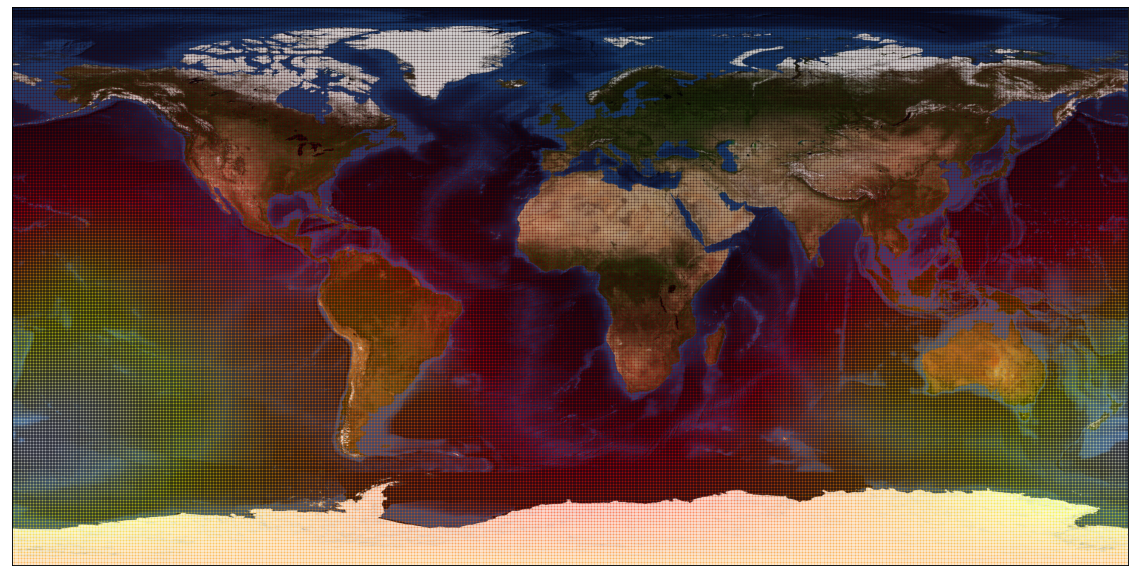

In [140]:
lons = np.arange(-180,181)
lats = np.arange(-90,91)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='i')
# m= Basemap(projection='ortho',lon_0=77,lat_0=28)
# _ = m.drawcoastlines()
_ = m.bluemarble()
# _ = m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
# _ = m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
# _ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
cs = m.pcolor(xi,yi,z,latlon=True,alpha=0.2,cmap='hot')

### Plotting Depth Map

In [96]:
!wget --header="Host: www.bodc.ac.uk" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.gebco.net/data_and_products/gridded_bathymetry_data/" --header="Cookie: userid=122.161.148.24.1593942012605140" --header="Connection: keep-alive" "https://www.bodc.ac.uk/data/open_download/gebco/gebco_2020/zip/" -c -O 'gebco_2020_netcdf.zip'

--2020-07-06 12:53:51--  https://www.bodc.ac.uk/data/open_download/gebco/gebco_2020/zip/
Resolving www.bodc.ac.uk (www.bodc.ac.uk)... 192.171.196.106
Connecting to www.bodc.ac.uk (www.bodc.ac.uk)|192.171.196.106|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: unspecified [application/octet-stream]
Saving to: ‘gebco_2020_netcdf.zip’

gebco_2020_netcdf.z     [             <=>    ]   3.73G  17.4MB/s    in 3m 23s  

2020-07-06 12:57:15 (18.8 MB/s) - ‘gebco_2020_netcdf.zip’ saved [4008573685]



In [97]:
!unzip gebco_2020_netcdf.zip

Archive:  gebco_2020_netcdf.zip
  inflating: GEBCO_2020_Grid.pdf     
  inflating: GEBCO_Grid_terms_of_use.pdf  
  inflating: GEBCO_2020.nc           


In [7]:
!wget --header="Host: www.bodc.ac.uk" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.gebco.net/data_and_products/historical_data_sets/" --header="Cookie: userid=122.161.148.24.1593942012605140" --header="Connection: keep-alive" "https://www.bodc.ac.uk/data/open_download/gebco/GEBCO_1MIN/zip/" -c -O 'GEBCO_ONE.zip'

--2020-07-06 13:27:05--  https://www.bodc.ac.uk/data/open_download/gebco/GEBCO_1MIN/zip/
Resolving www.bodc.ac.uk (www.bodc.ac.uk)... 192.171.196.106
Connecting to www.bodc.ac.uk (www.bodc.ac.uk)|192.171.196.106|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 287717935 (274M) [application/octet-stream]
Saving to: ‘GEBCO_ONE.zip’

GEBCO_ONE.zip       100%[===================>] 274.39M  20.0MB/s    in 14s     

2020-07-06 13:27:22 (19.2 MB/s) - ‘GEBCO_ONE.zip’ saved [287717935/287717935]



In [8]:
!unzip GEBCO_ONE.zip

Archive:  GEBCO_ONE.zip
  inflating: GRIDONE_2D.nc           
  inflating: GRIDONE.html            
  inflating: Terms_of_Use_of_The_GEBCO_Grid_and_derived_information_products.html  


In [151]:
import netCDF4
from mpl_toolkits.basemap import Basemap

# Load data
dataset = netCDF4.Dataset('GRIDONE_2D.nc')
dataset.variables['elevation']

masked_array(data=-4229.,
             mask=False,
       fill_value=1e+20)

In [83]:
k = dataset.variables['lat'][:]
len(k)/(k.max()-k.min())

60.00555555555555

In [85]:
len(k)

10801

In [76]:
print(dataset.variables['lon'][:].shape)
print(dataset.variables['lat'][:].shape)

(21601,)
(10801,)


In [ ]:

# Extract variables
x = dataset.variables['lon']
y = dataset.variables['lat']
spacing = dataset.variables['spacing']

# Compute Lat/Lon
nx = (x[-1]-x[0])/spacing[0]   # num pts in x-dir
ny = (y[-1]-y[0])/spacing[1]   # num pts in y-dir

lon = np.linspace(x[0],x[-1],nx)
lat = np.linspace(y[0],y[-1],ny)

# Reshape data
zz = dataset.variables['z']
Z = zz[:].reshape(ny, nx)

# setup basemap.
m = Basemap(llcrnrlon=-30,llcrnrlat=45.0,urcrnrlon=5.0,urcrnrlat=65.0,
            resolution='i',projection='stere',lon_0=-15.0,lat_0=55.0)

x,y = m(*np.meshgrid(lon,lat))

m.contourf(x, y, flipud(Z));
m.fillcontinents(color='grey');
m.drawparallels(np.arange(10,70,10), labels=[1,0,0,0]);
m.drawmeridians(np.arange(-80, 5, 10), labels=[0,0,0,1]);

In [86]:
dataset.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (21601,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [19]:
dataset.variables['lon'][0]

masked_array(data=-180.,
             mask=False,
       fill_value=1e+20)

In [17]:
dataset.variables['lat'][0]

masked_array(data=-90.,
             mask=False,
       fill_value=1e+20)

In [60]:
dataset.variables['lat']

AttributeError: ignored

In [119]:
all = [dataset.variables['lon'][-179.98],dataset.variables['lat'][-89.98958333]]

In [24]:
dataset.variables['elevation'][-180,-42.0]

masked_array(data=-3896.,
             mask=False,
       fill_value=1e+20)

In [116]:
all

[masked_array(data=[-179.99791667, -179.99375   , -179.98958333, ...,
                     179.98958333,  179.99375   ,  179.99791667],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[-89.99791667, -89.99375   , -89.98958333, ...,
                     89.98958333,  89.99375   ,  89.99791667],
              mask=False,
        fill_value=1e+20)]

In [101]:
!pip install netcdf4

     |████████████████████████████████| 4.1MB 3.4MB/s 
     |████████████████████████████████| 286kB 34.9MB/s 


In [34]:
np.array()

array([-180.        , -179.98333333, -179.96666667, ...,  179.96666667,
        179.98333333,  180.        ])

In [39]:
 dataset.variables['lon'][maxlon]

masked_array(data=179.,
             mask=False,
       fill_value=1e+20)

In [45]:
lat.shape

(3,)

In [52]:
max(lon)-min(lon)

0.08333333333331439

In [47]:
topo.shape

(3, 6)

In [49]:
grid_y.shape

(9, 3)

### Tsunami

In [78]:
!wget wget --header="Host: ngdc.noaa.gov" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://ngdc.noaa.gov/hazard/tsu_db.shtml" --header="Cookie: JSESSIONID=9E3D604A371F58D7310B67CF87BAE061; _4c_=fVHJTsMwEP0V5HOdeIuX3hBIiA9AHFFiu21EGkeOmwBV%2F51xSakEAl8865s3b45o3vkerWllBCGVINpwvkKv%2Fn1E6yOKrcvfhNaoZg1ltaJYmUZh4SqLDW085lrLhhjtqOFohd4ASxIqpTEcDH5aoam9YKhGamukwJQwjoWwDIPHsNw4oTbWNd7pBePMR0hVGapWKKUOYprkB4h2WBCPyAbnAZmaQhV5fvoAj3MCpu%2FzzCE6sA8RANAupWFcl2Wwvu5HH6fW%2BqIPdV1sw1RuapvGcoh%2BHA%2FRF7u076Dz4fbl8T5PqIiuKsNEAdw4yAT7QXqIwR1seknvQ%2BYx%2B%2BZmdK%2BQaGKYYQTE7nYx7P2NzvQCyIqe295BEtzoNz7Gc9WF2zzPwCZsO1%2FYsC%2BhaGxThr7wXCJwoiWI%2B5CxhrxtptQFW3e5Aw575v%2F09wKnq9raMKUZoYvaWoqL3EO3yE2v1VQxJan5vo24Vk%2B%2FqzO2ZIT8xv6SCTb4p43%2FbDudPgE%3D; _ga=GA1.3.1620922116.1594021683; _gid=GA1.3.836343108.1594021683; _gat_GSA_ENOR0=1; _gat_GSA_ENOR1=1" --header="Connection: keep-alive" "https://ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$ID&t=101650&s=69&d=59&dfn=tsevent.txt" -c -O 'tsevent.txt'    

--2020-07-06 15:04:24--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-07-06 15:04:24--  https://ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=&t=101650&s=69&d=59&dfn=tsevent.txt
Resolving ngdc.noaa.gov (ngdc.noaa.gov)... 140.172.190.1
Connecting to ngdc.noaa.gov (ngdc.noaa.gov)|140.172.190.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘tsevent.txt’

tsevent.txt             [  <=>               ] 264.92K   692KB/s    in 0.4s    

2020-07-06 15:04:25 (692 KB/s) - ‘tsevent.txt’ saved [271273]

FINISHED --2020-07-06 15:04:25--
Total wall clock time: 0.6s
Downloaded: 1 files, 265K in 0.4s (692 KB/s)


In [3]:
import pandas as pd
import codecs

doc = codecs.open('tsevent.txt','rU','utf-8') #open for reading with "universal" type set

df = pd.read_csv(doc, sep='\t')

In [4]:
df.head()

ID  YEAR  ...  TOTAL_HOUSES_DAMAGED  TOTAL_HOUSES_DAMAGED_DESCRIPTION
0   1 -2000  ...                   NaN                               NaN
1   3 -1610  ...                   NaN                               NaN
2   4 -1365  ...                   NaN                               NaN
3   5 -1300  ...                   NaN                               NaN
4   6  -760  ...                   NaN                               NaN

[5 rows x 46 columns]

In [5]:
df = df.loc[:,['LATITUDE','LONGITUDE']];
df = df.dropna()
df.head()
lat = df.loc[:,['LATITUDE']].values
lon = df.loc[:,['LONGITUDE']].values

In [6]:
lat.shape

(2321, 1)

In [7]:
lon.shape

(2321, 1)

In [21]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return (c * r) 

In [9]:
def getTsunamiCost(la,lo):
    cost = 0
    for t in range(len(lat)):
        # print(lat[t])
        cost+=(distance(lat[t],la,lon[t],lo))
    cost/=(len(lat))
    # cost = sqrt(cost)
    return cost

In [2]:
import numpy as np

In [15]:
import pickle

In [24]:
with open('./drive/My Drive/Aeross Round 2/Ideation/Tsunami.pkl','wb') as f:
    pickle.dump(z,f)

In [33]:
del z

In [38]:
n = 0
z = np.zeros((361,181),dtype=np.float128)
for x,i in enumerate(np.linspace(-180.0,180.0,361)): #Lon
    for y,j in enumerate(np.linspace(-90,90,181)): #Lat
        z[x,y] = getTsunamiCost(j,i)
    if(x%100==0):
        print(x)
    if(x%300==0):
        np.save('./drive/My Drive/Aeross Round 2/Ideation/Tsunami.pkl', z) 

0
100
200
300


In [39]:
np.save('./drive/My Drive/Aeross Round 2/Ideation/TsunamiFinal.pkl', z) 

In [42]:
z-=z.min()

In [43]:
z/=z.max()

In [47]:
z

array([[221.79835337, 220.99718089, 220.18477291, ...,  31.63384817,
         32.4119112 ,  33.20164663],
       [221.79835337, 221.00931   , 220.20907452, ...,  31.658059  ,
         32.42401776,  33.20164663],
       [221.79835337, 221.02167332, 220.23383543, ...,  31.68276368,
         32.43636719,  33.20164663],
       ...,
       [221.79835337, 220.97364011, 220.13757756, ...,  31.58693749,
         32.38844132,  33.20164663],
       [221.79835337, 220.98528971, 220.16093813, ...,  31.61013859,
         32.40005118,  33.20164663],
       [221.79835337, 220.99718089, 220.18477291, ...,  31.63384817,
         32.4119112 ,  33.20164663]], dtype=float128)

In [3]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


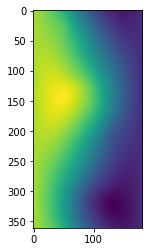

In [50]:
plt.imshow(z)

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [54]:
m = Basemap()

In [11]:
lons = np.arange(-180,181)
lats = np.arange(-90,91)

In [75]:
lons.shape

(361,)

In [12]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

In [5]:
z = np.load('./drive/My Drive/Aeross Round 2/Ideation/TsunamiFinal.pkl.npy')

In [6]:
z = np.transpose(z,(1,0))

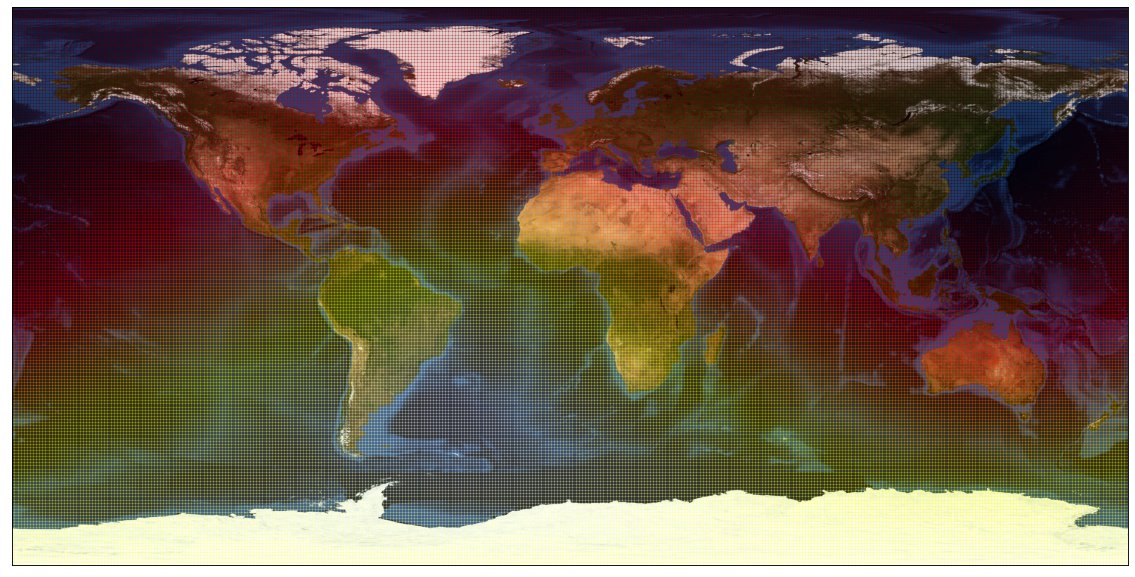

In [14]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='i')
# m= Basemap(projection='ortho',lon_0=77,lat_0=28)
# _ = m.drawcoastlines()
_ = m.bluemarble()
# _ = m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
# _ = m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
# _ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
cs = m.pcolor(xi,yi,z,latlon=True,alpha=0.2,cmap='hot')

In [68]:
Matrix.shape

(7, 5)

In [70]:
NumX

5

# Mixed

In [179]:
dataset = netCDF4.Dataset('GRIDONE_2D.nc')
depth = dataset.variables['elevation']

In [160]:
tsunami = np.load('./drive/My Drive/Aeross Round 2/Ideation/TsunamiFinal.pkl.npy')
vents = np.load('./drive/My Drive/Aeross Round 2/Ideation/Backup/VentsFinal2.pkl.npy')
ports = np.load('./drive/My Drive/Aeross Round 2/Ideation/Ports.pkl.npy')


In [216]:
vents = np.load('./drive/My Drive/Aeross Round 2/Ideation/Backup/VentsFinal2.pkl.npy')

In [218]:
vents[(vents.round())==1537]

TypeError: ignored

In [161]:
tsunami-=tsunami.min()
tsunami/=tsunami.max()

In [162]:
vents-=vents.min()
vents/=vents.max()

In [163]:
ports-=ports.min()
ports/=ports.max()
ports = np.transpose(ports,(1,0))

In [172]:
print(tsunami.shape)
print(vents.shape)
print(ports.shape)

(361, 181)
(361, 181)
(361, 181)


In [213]:
weights = {
    "Vents":3,
    "Ports":2,
    "Depth":4,
    "Tsunami":-3
}

In [214]:
n = 0
mixed = np.zeros((361,181),dtype=np.float128)
for x,i in enumerate(np.linspace(-180.0,180.0,361)): #Lon
    for y,j in enumerate(np.linspace(-90,90,181)): #Lat
        elev = depth[j,i]
        elev = float(elev.data)
        # if(elev>0):
        #     # print(depth)
        #     continue
        # print(elev)
        # break
        elev*=-1
        elev%=6000
        elev/=6000
        mixed[x][y] = weights["Vents"]*vents[x,y] + weights["Ports"]*ports[x][y] + weights["Depth"]*elev + weights["Tsunami"]*(tsunami[x][y])

In [184]:
int(elev.data)

0

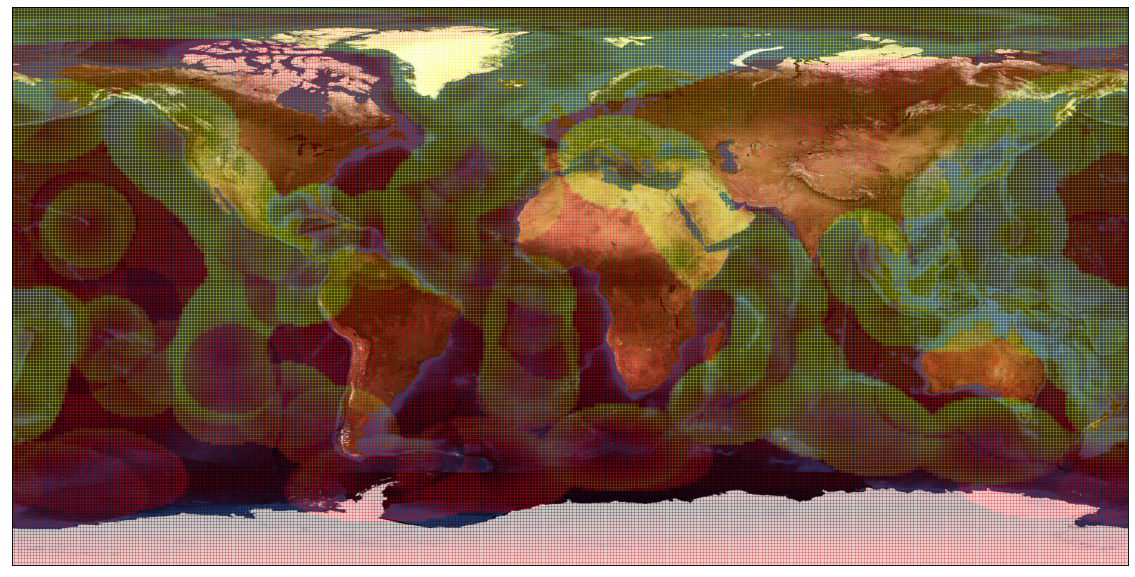

In [215]:
mixed2 = np.transpose(mixed,(1,0))
lons = np.arange(-180,181)
lats = np.arange(-90,91)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# m= Basemap(projection='ortho',lon_0=77,lat_0=28)
# _ = m.drawcoastlines()
_ = m.bluemarble()
# _ = m.fillcontinents(color='coral',lake_color=None)
# m.drawmapboundary(fill_color='aqua')
# _ = m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
# _ = m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) #
cs = m.pcolor(xi,yi,mixed2,latlon=True,alpha=0.2,cmap='hot')